# Ultralytics Inference Sandbox

model: https://hub.ultralytics.com/models/R6nMlK6kQjSsQ76MPqQM?tab=preview

In [1]:
# !cd ~/git/Vancouver-Watching; pip3 install -e .

In [2]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [3]:
import cv2
from abcli import file
from abcli.plugins.graphics.text import render_text
from abcli import fullname
from abcli.modules import objects
from abcli import string
from abcli.plugins import seed
from vancouver_watching.ai.classes import Ultralytics_API
import matplotlib.pyplot as plt

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2619.1-unknown, built on 13 January 2024, 19:00:17


In [4]:
object_name = "2024-01-11-18-18-04-55658"
object_path = objects.object_path(object_name)

In [5]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli download - $object_name

🔋 gpu: not found.
🚀 abcli-7.2619.1.2023-06-aws-batch-a
downloading 2024-01-11-18-18-04-55658: open ...
download: s3://kamangir/bolt/2024-01-11-18-18-04-55658/abcli.log to ../../../storage/abcli/2024-01-11-18-18-04-55658/abcli.log
download completed: 2024-01-11-18-18-04-55658 


---

In [6]:
ultralytics_api = Ultralytics_API("R6nMlK6kQjSsQ76MPqQM")

Ultralytics_API.url: https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM


In [7]:
image_filename = os.path.join(object_path, "georgiaE.jpg")

In [8]:
success, response_dict = ultralytics_api.infer(image_filename)
assert success
# response_dict

Ultralytics_API.infer(/Users/kamangir/storage/abcli/2024-01-11-18-18-04-55658/georgiaE.jpg)
car: 5, bus: 1, traffic light: 1
abcli.file.save_image(524x800x3:uint8) -> /Users/kamangir/storage/abcli/2024-01-11-18-18-04-55658/georgiaE-inference.jpg


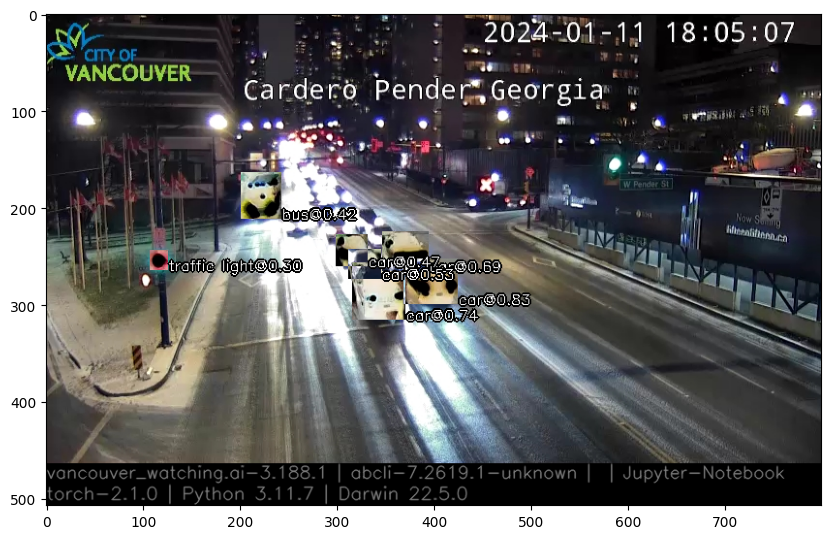

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(ultralytics_api.render(
    file.load_image(image_filename)[1].copy(),
    response_dict
))
plt.show()

---

In [10]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

🔋 gpu: not found.
🚀 abcli-7.2619.1.2023-06-aws-batch-a
📂 object :: 2024-01-11-18-18-04-55658


2024-01-11-18-18-04-55658 += #built_by_notebook.


confirmed: 2024-01-11-18-18-04-55658 does not exist.
2024-01-11-18-18-04-55658 open upload started.
upload: ./abcli.log to s3://kamangir/bolt/2024-01-11-18-18-04-55658/abcli.log
upload: ./georgiaE-inference.jpg to s3://kamangir/bolt/2024-01-11-18-18-04-55658/georgiaE-inference.jpg


2024-01-11-18-18-04-55658 += #open.


In [11]:
seed.log(object_name)

abcli select 2024-01-11-18-18-04-55658; open .


In [12]:
# END